# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
#Import sklearn before tensorflow
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
print(tf.__version__), sys.version, sklearn.show_versions()

2.4.1

System:
    python: 3.7.3 (default, Jan 22 2021, 20:04:44)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-5.10.17-v8+-aarch64-with-debian-10.9

Python dependencies:
          pip: 21.0.1
   setuptools: 54.1.2
      sklearn: 0.24.1
        numpy: 1.19.5
        scipy: 1.6.1
       Cython: 0.29.22
       pandas: 1.2.3
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


(None, '3.7.3 (default, Jan 22 2021, 20:04:44) \n[GCC 8.3.0]', None)

In [3]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

#Make example classification data with scikit learn
# Make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)



In [5]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [6]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
# Our data is a little hard to understand right now, so lets visualize it
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [8]:
circles["label"].value_counts()

0    500
1    500
Name: label, dtype: int64

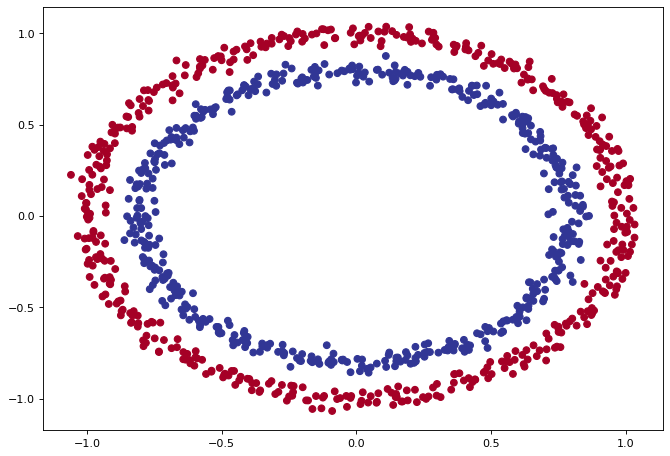

In [9]:
# Visualize with a plot
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Input and output shapes

In [10]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# How many samples we're working with
len(X),  len(y)

(1000, 1000)

In [12]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in Modelling


In [13]:
# Build a neural network to classify if something is a blue dot or a red dot
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    #metrics = [tf.keras.metrics.binary_accuracy]
    metrics = ["accuracy"]
)

# 3. Fit the model
model_1.fit(X, y, epochs = 5)


Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5140


In [14]:
# Lets improve our model by training for longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [15]:
# Since we're working on a binary classification problem, and our model is getting around 50% accuracy, its performing as if its guessing. Lets add another layer to try to see if it improves the model.

#1 create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

#3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

# Improve our model

Ways to improve a model:
* Create model - add more layers or increase hidden units within layers
* Compiling a model - choose a different optimization function such as Adam
* Fitting a model - fit for more epochs

In [16]:
#1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),#, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10),#, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)#, activation = tf.keras.activations.softmax)
])

#2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#3. Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)
history.history

32/32 [==============================] - 1s 3ms/step - loss: 0.7019 - accuracy: 0.5100


{'loss': [2.3778817653656006,
  0.7022444605827332,
  0.6933967471122742,
  0.6966973543167114,
  0.6954717636108398,
  0.6961308121681213,
  0.6955198049545288,
  0.6956713199615479,
  0.6985599398612976,
  0.6947155594825745,
  0.7013040781021118,
  0.6956636905670166,
  0.6979178786277771,
  0.6955538392066956,
  0.6975550651550293,
  0.6950308084487915,
  0.7021978497505188,
  0.6960029006004333,
  0.6973491311073303,
  0.6988657116889954,
  0.6983534693717957,
  0.6968231201171875,
  0.6958418488502502,
  0.6977359652519226,
  0.701679527759552,
  0.6977074146270752,
  0.6986008882522583,
  0.6979817152023315,
  0.7000268697738647,
  0.7091652154922485,
  0.6940588355064392,
  0.6976263523101807,
  0.698390543460846,
  0.7019924521446228,
  0.6975201964378357,
  0.6956778168678284,
  0.6967078447341919,
  0.699447512626648,
  0.7003434300422668,
  0.6974472999572754,
  0.6983053088188171,
  0.7036623954772949,
  0.6965476870536804,
  0.6982492208480835,
  0.7028172016143799,
  0.6

Text(0.5, 0, 'epochs')

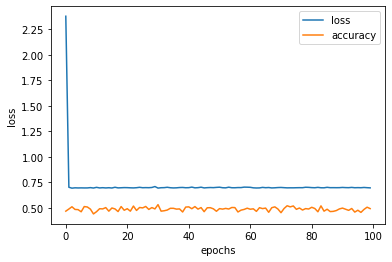

In [17]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [18]:
model_3.predict(X)

[0.4123013 ],
       [0.49730638],
       [0.5231144 ],
       [0.4562776 ],
       [0.5765928 ],
       [0.5227976 ],
       [0.46916902],
       [0.4750364 ],
       [0.56466883],
       [0.45439884],
       [0.6112277 ],
       [0.51184857],
       [0.53196466],
       [0.49379995],
       [0.49531397],
       [0.6157296 ],
       [0.55227196],
       [0.5970256 ],
       [0.5862045 ],
       [0.4693467 ],
       [0.5195469 ],
       [0.4945298 ],
       [0.5660727 ],
       [0.4373702 ],
       [0.5373189 ],
       [0.5802529 ],
       [0.5409489 ],
       [0.54820967],
       [0.58104354],
       [0.48356578],
       [0.5468329 ],
       [0.5273295 ],
       [0.5884294 ],
       [0.51265955],
       [0.55704165],
       [0.5211425 ],
       [0.51038784],
       [0.50259167],
       [0.45338288],
       [0.59260565],
       [0.5751187 ],
       [0.5060521 ],
       [0.4391981 ],
       [0.41974163],
       [0.4747574 ],
       [0.6127263 ],
       [0.54566044],
       [0.41119644],

# To visualize our models predictions, lets create a function named plot_decision_boundary
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the mesh grid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [19]:
def plot_decision_boundary (model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions to get them ready
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Doing binary classification


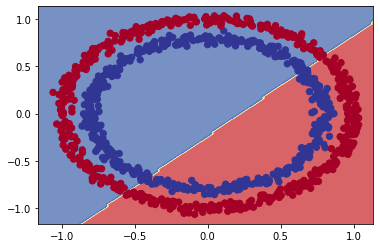

In [20]:
# Check out the decisions our model is making
plot_decision_boundary (model = model_3, 
                        X=X, 
                        y=y)

In [21]:
# Define the axis boundaries of the plot and create a meshgrid
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max, X

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805,
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]))

In [22]:
# Lets see if our model can be used for a regression problem...
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X+100

#Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),#, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10),#, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)#, activation = tf.keras.activations.softmax)
])

#2. Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

#3. Fit the model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs = 100)
model_3.evaluate(X_reg_test, y_reg_test)
history.history



Epoch 1/100
5/5 [==============================] - 2s 4ms/step - loss: 465.5204 - mae: 465.5204
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 328.4780 - mae: 328.4780
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 218.3737 - mae: 218.3737
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 91.4549 - mae: 91.4549
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 64.0482 - mae: 64.0482
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 90.8448 - mae: 90.8448
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 66.2273 - mae: 66.2273
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 48.4437 - mae: 48.4437
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.6928 - mae: 47.6928
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 41.5080 - mae: 41.5080
Epoch 11/100
5/5 [==============================] - 0

{'loss': [2.3778817653656006,
  0.7022444605827332,
  0.6933967471122742,
  0.6966973543167114,
  0.6954717636108398,
  0.6961308121681213,
  0.6955198049545288,
  0.6956713199615479,
  0.6985599398612976,
  0.6947155594825745,
  0.7013040781021118,
  0.6956636905670166,
  0.6979178786277771,
  0.6955538392066956,
  0.6975550651550293,
  0.6950308084487915,
  0.7021978497505188,
  0.6960029006004333,
  0.6973491311073303,
  0.6988657116889954,
  0.6983534693717957,
  0.6968231201171875,
  0.6958418488502502,
  0.6977359652519226,
  0.701679527759552,
  0.6977074146270752,
  0.6986008882522583,
  0.6979817152023315,
  0.7000268697738647,
  0.7091652154922485,
  0.6940588355064392,
  0.6976263523101807,
  0.698390543460846,
  0.7019924521446228,
  0.6975201964378357,
  0.6956778168678284,
  0.6967078447341919,
  0.699447512626648,
  0.7003434300422668,
  0.6974472999572754,
  0.6983053088188171,
  0.7036623954772949,
  0.6965476870536804,
  0.6982492208480835,
  0.7028172016143799,
  0.6

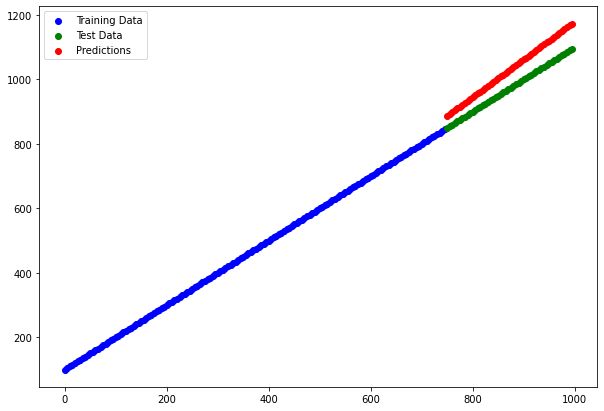

In [23]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predictions")
plt.legend()

# The Missing Piece: Non Linearity

In [24]:
tf.random.set_seed(42)
# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.binary_accuracy]
)

# 3. Fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 4.6225 - binary_accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3079 - binary_accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5266 - binary_accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0583 - binary_accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2318 - binary_accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7731 - binary_accuracy: 0.4449
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9250 - binary_accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6242 - binary_accuracy: 0.4246
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8760 - binary_accuracy: 0.3962
Epoch 10/100
32/32 [==========================

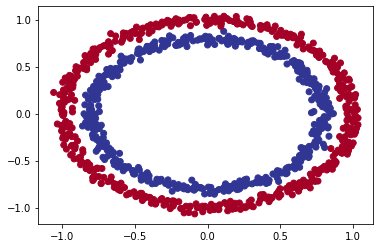

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

Doing binary classification


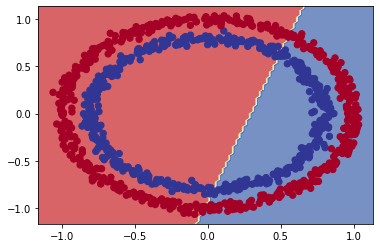

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(
    model_4,
    X=X,
    y=y
)

In [27]:
# Play with the tensorflow playground and try other activation functions
# 1. Create a model with a non linear activation
model_5 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=.001),
    metrics = [tf.keras.metrics.binary_accuracy]
)

# 3. Fit the model
history = model_5.fit(X, y, epochs = 100, verbose = 0)

Doing binary classification


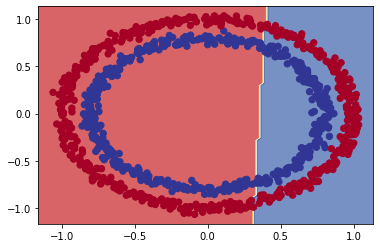

In [28]:
plot_decision_boundary(
    model_5,
    X=X,
    y=y
)

In [29]:
# Play with the tensorflow playground and try other activation functions
# 1. Create a model with a non linear activation
model_6 = tf.keras.Sequential ([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=.001),
    metrics = [tf.keras.metrics.binary_accuracy]
)

# 3. Fit the model
history = model_6.fit(X, y, epochs = 250, verbose = 0)

Doing binary classification


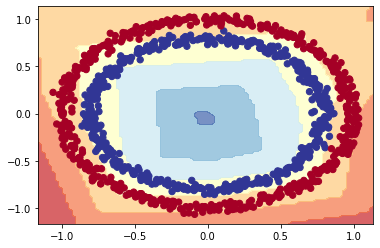

In [30]:
plot_decision_boundary(
    model_6,
    X=X,
    y=y
)

# Change Output Layer Activation to Fix the Model (Softmax or Sigmoid)

In [31]:
tf.random.set_seed(42)

# 1. Build the model with output layer activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile (
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=.001),
    metrics = [tf.keras.metrics.binary_accuracy]
)

history = model_7.fit(X, y, epochs=250)

 0s 3ms/step - loss: 0.5927 - binary_accuracy: 0.7332
Epoch 66/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5919 - binary_accuracy: 0.7251
Epoch 67/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5845 - binary_accuracy: 0.7195
Epoch 68/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5664 - binary_accuracy: 0.7750
Epoch 69/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5593 - binary_accuracy: 0.8049
Epoch 70/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5635 - binary_accuracy: 0.7975
Epoch 71/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5457 - binary_accuracy: 0.8164
Epoch 72/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5448 - binary_accuracy: 0.8228
Epoch 73/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5341 - binary_accuracy: 0.8497
Epoch 74/250
32/32 [==============================] - 0s 4ms/step - loss: 0.5257 - binary_

In [32]:
model_7.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.0459 - binary_accuracy: 0.9920


[0.04593350738286972, 0.9919999837875366]

Doing binary classification


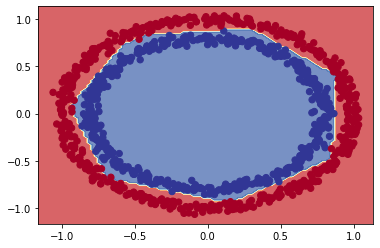

In [33]:
plot_decision_boundary(
    model_7,
    X=X,
    y=y
)

# Replicate the Sigmoid Function

In [34]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

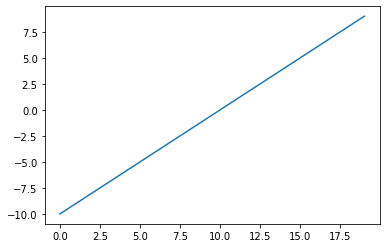

In [35]:
# Visualize our toy tensor
plt.plot(A)

In [36]:
# Lets start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid (x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

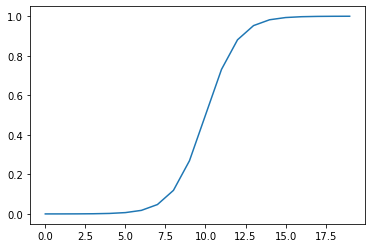

In [37]:
# Plot the sigmoid
plt.plot(sigmoid(A))

# Replicate the ReLU Function

In [38]:
# relu(x) = max(0, x)
def relu (x):
    return tf.maximum(0, x)

# Use the relu function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

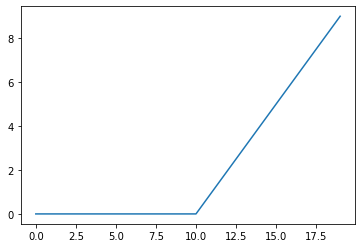

In [39]:
# Plot the relu
plt.plot(relu(A))

# Linear Activation function is just a pass through

In [40]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

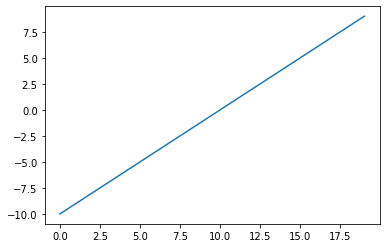

In [41]:
plt.plot(tf.keras.activations.linear(A))

# Evaluating and improving our classification model

So far we've been training and testing on the same dataset.
However in machine learning this is basically a sin.
So lets create a training and test set.

In [42]:
#Chech how many examples we have
len(X)

1000

In [43]:
# Split into traing and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [45]:
#Recreate a model to fit on the training data and evaluate on the testing data
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile a model
model_8.compile (
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)




Epoch 1/25
25/25 [==============================] - 2s 4ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In [46]:
model_8.evaluate(X_test, y_test)


7/7 [==============================] - 1s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468824535608292, 1.0]

Doing binary classification
Doing binary classification


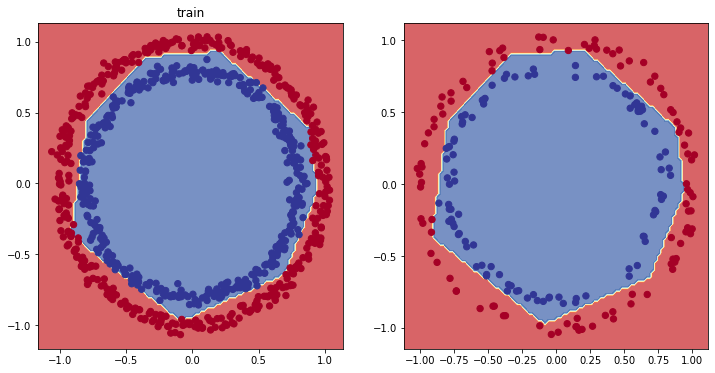

In [47]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
#1 row, 2 columns
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_8, X=X_test, y=y_test)

# Plot the loss (or training) curves


In [48]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

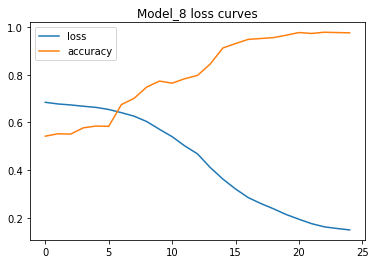

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


# The loss function going down means the model is improving. The predictions are getting closer to the ground truth

# Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while its training
* Another model
* A modified loss curves plot.


In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 2a Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

<AxesSubplot:xlabel='epochs'>

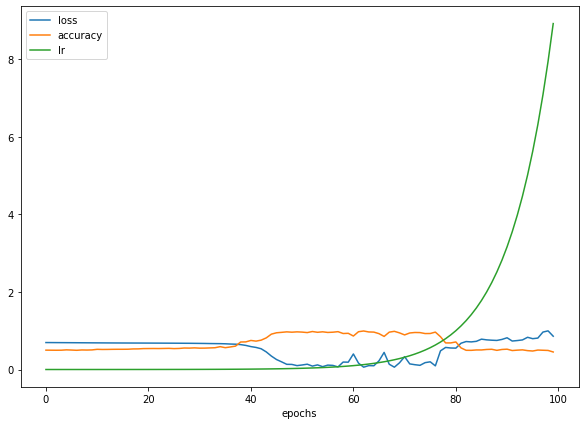

In [51]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

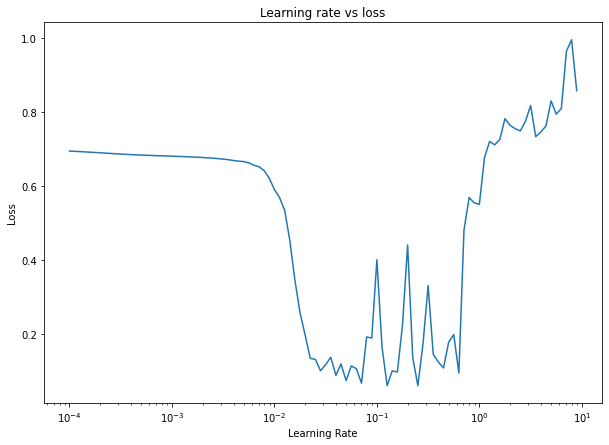

In [52]:
#Plot the learning rate values during traing versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [53]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
# Lets try using a higher ideal learning rate with the same model

#Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile (
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

In [55]:
#Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)


7/7 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740172788500786, 0.9900000095367432]

In [56]:
# Evaluate model 8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468824535608292, 1.0]

Doing binary classification
Doing binary classification


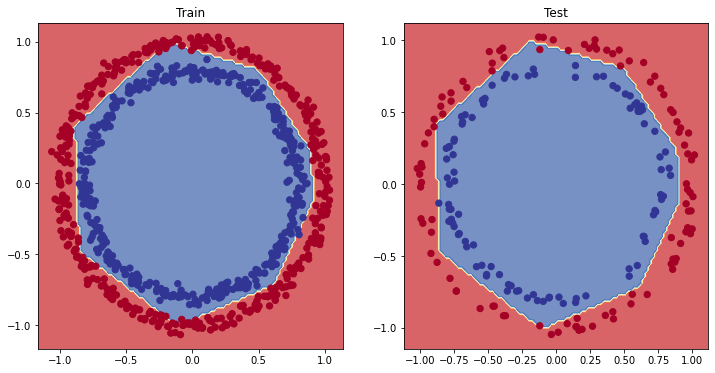

In [57]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)


# More classification evaluation methods

Alongside visualizing our models as much as possible, there are a handful of other classification evaluation methods you should be familiar with.
* Accuracy
* Precision - higher leads to less false positives
* Recall - higher recall leads to less false negatives
* F1 Score - combination of precision and Recall
* Confusion Matrix
* Classification report (from scikit-learn)



In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740172788500786
Model accuracy on the test set: 99.00%


# How about a confusion matrix?

In [68]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
# Make predictions
y_preds = model_10.predict(X_test)

# Create our confusion matrix
# Need to create our prediction probabilities to binary form
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [59]:
# Looks like our prediction array has come out in prediction probability form
# This is the standard output from the sigmoid or softmax function. It will need to be rounded to binary form.
y_test[:10], y_preds[:10], tf.round(y_preds[:10])


NameError: name 'y_preds' is not defined

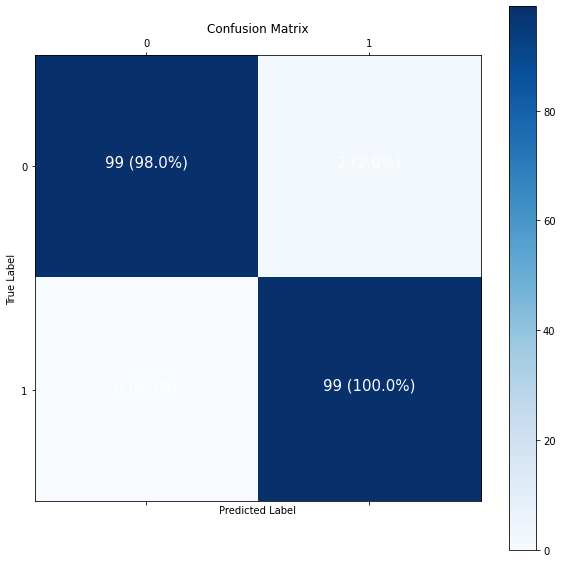

In [96]:
# Prettify the confusion matrix
# Note the confusion matrix code we are about to write is a remix learn of the scikit learn plot confusion matrix
import itertools
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix
n_classes = cm.shape[0]

# Lets prettify it
fig, ax = plt.subplots(figsize=figsize)
#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title="Confusion Matrix",
    xlabel="Predicted Label",
    ylabel="True Label",
    xticks = np.arange(n_classes),
    yticks = np.arange(n_classes),
    xticklabels = labels,
    yticklabels = labels)

# Set x axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.
 
# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment="center",
    color="white",
    size=15)

